<span style="background-color: #132577 ; display: block">&nbsp;</span>

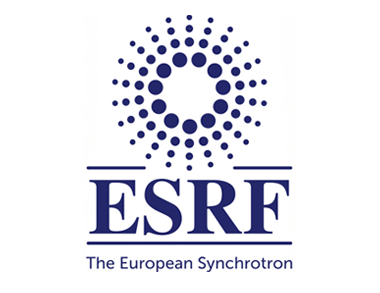

# jupyter-slurm.esrf.fr tutorial


Presenters: Loïc Huder and Thomas Vincent, Data Automation Unit, ISDD

3rd of October 2022

I. [**Usage of Jupyter-SLURM**](#I.-Usage-of-Jupyter-SLURM)

II. [**A tour of JupyterLab**](#II.-A-tour-of-JupyterLab)

III. [**Demo of notebooks and h5web**](#III.-Demo-of-notebooks)

IV. [**Advanced usage**](#IV.-Advanced-usage)
* Using a new "kernel"
* Using a custom Jupyter environment

<span style="background-color: #132577 ; display: block">&nbsp;</span>
## I. Usage of Jupyter-SLURM

SLURM is a job scheduler to request computing resources on the ESRF cluster. 

The webpage https://jupyter-slurm.esrf.fr allows to run **Jupyter notebooks** on the ESRF SLURM cluster.



Jupyter notebooks are computational documents that
- Run in a web browser
- Allow to:
  - run Python (or Octave) code interactively
  - embed with "rich" text explanations ([markdown](https://guides.github.com/features/mastering-markdown/)),
  - plot and use interactive "widgets"
- Can be used to provide explanations/formulae along with executable code

[Official Jupyter notebook documentation](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)

Usage of notebooks will be demonstrated later.

<span style="background-color: #132577 ; display: block">&nbsp;</span>
### Who can use jupyter-slurm?

- ESRF and CRGs staff
- Visitors and cyber-visitors
- Users: 10 days before/180 days after experiment

No proposal account

See https://confluence.esrf.fr/display/SCKB/Account+policy

<span style="background-color: #132577 ; display: block">&nbsp;</span>
### Presentation of https://jupyter-slurm.esrf.fr interface

#### Simple tab

- Architecture and partitions: Intel or Power9 (GPU)
- Number of cores and GPUs
- Jupyter environment
- Job duration

#### Advanced tab

- Access to all command line arguments (see [SLURM](https://confluence.esrf.fr/display/SCKB/SLURM) documentation for more info).

<span style="background-color: #132577 ; display: block">&nbsp;</span>
### Links

- Access: [https://jupyter-slurm.esrf.fr](https://jupyter-slurm.esrf.fr)
- [Jupyter @ ESRF](https://confluence.esrf.fr/display/SWGWK/Jupyter+@+ESRF) documentation on Confluence
- More advanced: [SLURM](https://confluence.esrf.fr/display/SCKB/SLURM) documentation on Confluence

<span style="background-color: #132577 ; display: block">&nbsp;</span>
## II. A tour of JupyterLab


- Browse directories
- Start a shell terminal
- Create/edit a notebook


<span style="background-color: #132577 ; display: block">&nbsp;</span>

## III. Demo of notebooks

In this section, we will write a Jupyter notebook to process data contained in a HDF5 file.

- Standard Python packages are installed on the cluster: `numpy`, `scipy`, `h5py`,... `silx`, `pymca`, `pyFAI`...
- [jupyterlab-h5web](https://confluence.esrf.fr/display/SWGWK/Jupyterlab-h5web%3A+explore+and+visualize+HDF5+file+contents+in+jupyter-slurm) can be used to view HDF5 files in JupyterLab

<details>
<summary></summary>
The resulting notebook can be found in the `demo` folder.
</details>

<span style="background-color: #132577 ; display: block">&nbsp;</span>
## IV. Advanced usage

### Break out of home

From the web interface, only your home directory is visible.

Yet, you can create "symbolic links" to folders you want to browse from the web-browser:

From the terminal, run: `ln -s <folder> [link-name]`

In [ ]:
# Example
!ln -s /tmp_14_days

### Leaving jupyter-slurm

Your session is running for the initially requested time.
Yet, if nothing is running for some time (currently 1h), the session is closed.

Closing the web browser tabs or login-out from jupyter-slurm do not release the cluster resources!

To do so, go to:

`File` menu → `Hub Control Panel` → `Stop My Server`

### SLURM log files

In case of issues with Jupyter, start your session by selecting **Save session logs** in the advanced panel.

SLURM will create `slurm-<job_num>.log` files in your home at the end of each job. The file contains the log of the Jupyter server.

### A word about security

Login and connection to jupyter-slurm is encrypted, but internal communication between jupyter-slurm and the slurm cluster is not:

A password entered for tools like `ssh` or `git` used inside jupyter-slurm is not encrypted inside ESRF.

### Notebooks are single user

- Notebooks are (so far) designed to run only for a single user at a time.
- You can only connect to jupyter-slurm with your user account (i.e., no "generic account" `opid99`).
  So, notebooks are created as belonging to the user.
  To allow others to edit them, they need to copy them or you need to change the file permissions.

<span style="background-color: #132577 ; display: block">&nbsp;</span>
## Adding "kernels"

It is possible to use a personal or shared conda or python virtual environment as a "kernel" in jupyter.

Relevant links:
- [ID01 jupyter-slurm doc](https://confluence.esrf.fr/display/BLID01KB/jupyter-slurm)
- [Kernel installation doc](https://ipython.readthedocs.io/en/latest/install/kernel_install.html)

### Creating a Python virtual environment

From a terminal:

* **Create** a Python [virtual environment](https://docs.python.org/3/library/venv.html): `python3 -m venv <Path where to create the virtualenv>`

  e.g., `python3 -m venv /tmp_14_days/jupyter/virtualenv`
* **Activate** the virtual environment to use it: `source <Path of the virtualenv>/bin/activate`

  e.g., `source /tmp_14_days/jupyter/virtualenv/bin/activate`
* **Install ipykernel**: `pip install ipykernel`
* Install more Python packages: `pip install numpy [...]`
* **Deactivate** the virtual env to use the system python: `deactivate`

Create the virtual environment on the same operating system/architecture as you will use it.

### Adding a kernel to jupyter

This can be run by many users if the virtualenv is readable.

* **Add the kernel**: `<Path of the virtualenv>/bin/python -m ipykernel install --user --name <Unique-kernel-name> --display-name <"Name in the New menu">`
* **Reload** the jupyter page

In [ ]:
!/tmp_14_days/jupyter/virtualenv/bin/python -m ipykernel install --user --name jupyter-tuto --display-name "Python (Tuto)"

### List kernels

In [ ]:
!/tmp_14_days/jupyter/virtualenv/bin/jupyter kernelspec list

### Removing a kernel from jupyter

* **Remove the kernel**: `<Path of the virtualenv>/bin/jupyter kernelspec uninstall <Unique-kernel-name>`
* **Reload** the jupyter page

In [ ]:
!/tmp_14_days/jupyter/virtualenv/bin/jupyter kernelspec remove -f jupyter-tuto

<span style="background-color: #132577 ; display: block">&nbsp;</span>
## Using a custom Jupyter server

It is possible to use a completely customized Jupyter(Lab) installation.

The interest is to manage JupyterLab extensions.

### Prepare a Python environment

* Prepare a virtual (or conda) environement
* Install the required packages:

`pip install jupyterlab batchspawner==1.1.0 jupyterhub==2.3.1`

### Start a session with a `custom` environment


In the **Advanced panel**, in the **Jupyter environment** section, add a `custom` environment by providing the path to this environment (finishing with `.../bin`.
 

<span style="background-color: #132577 ; display: block">&nbsp;</span>
## Open a session with a single URL

It is possible to prepare a URL that automatically starts a session, for example:

https://jupyter-slurm.esrf.fr/hub/spawn?partition=jupyter-nice&nprocs=1&runtime=01:00:00


See [Documentation](https://github.com/silx-kit/jupyterhub_moss/tree/v4.0.0#spawn-through-url)

<span style="background-color: #132577 ; display: block">&nbsp;</span>
## Virtual environments on Power9 computer

Some pre-compiled Python packages (a.k.a. wheels) are available from http://www.silx.org/pub/wheelhouse:

numpy, scipy, matplotlib, h5py, scikit-image, scikit-learn (and their dependencies).

To install them, run:

`pip install --trusted-host www.silx.org --find-links http://www.silx.org/pub/wheelhouse <package>`

<span style="background-color: #132577 ; display: block">&nbsp;</span>
## What's next?

### https://jupyter-slurm.esrf.fr

Providing up-to-date Jupyter environments (aiming at a yearly rate)

### https://visa.esrf.fr

**VISA (Virtual Infrastructure for Scientific Analysis)** provides remote desktop and Jupyter running on virtual machines.


Comparison:

- SLURM: Guaranteed compute resources, "short" runtime (currently 24h max)
- VISA: Shared compute resources, "long" runtime (weeks)


<span style="background-color: #132577 ; display: block">&nbsp;</span>
# Thanks for your attention

- Access: https://jupyter-slurm.esrf.fr
- [Jupyter @ ESRF](https://confluence.esrf.fr/display/SWGWK/Jupyter+@+ESRF) documentation on [confluence.esrf.fr](https://confluence.esrf.fr/)
- Mailing list: jupyter@esrf.fr
- ESRF chat channel: https://chat.esrf.fr/channel/jupyter-slurm

**Credits**: A. Campbell, TID/Computing Service team, A. Bocciarelli, J. Kieffer, A. Goetz, V. A. Sole.

**Funding EU projects**: [Panosc](https://www.panosc.eu/), [Calipsoplus](http://www.calipsoplus.eu/)

**Presentation material:**
- `/tmp_14_days/jupyter`
- https://gitlab.esrf.fr/silx/training/jupyter-slurm

In [ ]:
# Questions?

Final words: `File` menu → `Control Panel` → `Stop My Server`